In [1]:

# Complete RNN & LSTM Tutorial - Sequential Data Processing
# From Basics to Advanced Applications

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)


In [3]:
# Style settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 6)


In [4]:
print("=" * 100)
print("🔄 RECURRENT NEURAL NETWORKS (RNN) & LSTM - COMPLETE TUTORIAL")
print("=" * 100)
print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")
print("=" * 100)

🔄 RECURRENT NEURAL NETWORKS (RNN) & LSTM - COMPLETE TUTORIAL
TensorFlow Version: 2.19.0
GPU Available: True


In [5]:
# ============================================================================
# PART 1: SIMPLE RNN - UNDERSTANDING SEQUENCES
# ============================================================================


In [6]:
print("\n" + "=" * 100)
print("📚 PART 1: SIMPLE RNN - SEQUENTIAL DATA BASICS")
print("=" * 100)


📚 PART 1: SIMPLE RNN - SEQUENTIAL DATA BASICS


In [ ]:
# Generate synthetic sequence data for binary classification
print("\n🎲 Generating Synthetic Sequential Data...")

In [7]:
def generate_sequences(n_samples=1000, seq_length=20):
    """Generate sequences where label depends on sum of sequence"""
    X = np.random.randn(n_samples, seq_length, 1)
    # Label is 1 if sum > 0, else 0
    y = (X.sum(axis=1) > 0).astype(int).flatten()
    return X, y

In [8]:
X_seq, y_seq = generate_sequences(n_samples=2000, seq_length=20)
print(f"Sequence Data Shape: {X_seq.shape}")
print(f"Labels Shape: {y_seq.shape}")
print(f"Class Distribution: {np.bincount(y_seq)}")

Sequence Data Shape: (2000, 20, 1)
Labels Shape: (2000,)
Class Distribution: [1016  984]


In [9]:
# Split data
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42
)


In [11]:
X_train_seq

array([[[ 0.85419965],
        [-0.23145221],
        [ 0.80178518],
        ...,
        [-0.01602499],
        [-0.31316152],
        [ 2.78323514]],

       [[ 0.50702027],
        [-0.05739537],
        [-1.3954485 ],
        ...,
        [-0.87443565],
        [ 0.6276063 ],
        [-0.27950746]],

       [[-0.93817985],
        [ 0.35716259],
        [-0.895947  ],
        ...,
        [ 0.96742942],
        [ 0.90841424],
        [ 0.71077403]],

       ...,

       [[ 0.26978393],
        [ 0.01159386],
        [-1.02594334],
        ...,
        [ 0.67714997],
        [-0.20244317],
        [-1.12750425]],

       [[ 0.51315528],
        [ 1.59046427],
        [-0.17597405],
        ...,
        [ 0.52711959],
        [-0.57618971],
        [-1.34055429]],

       [[-0.90374872],
        [ 0.27490211],
        [ 1.45466429],
        ...,
        [ 1.02549359],
        [ 0.49972627],
        [ 0.83774623]]])

In [12]:
y_seq

array([0, 0, 0, ..., 1, 1, 1])

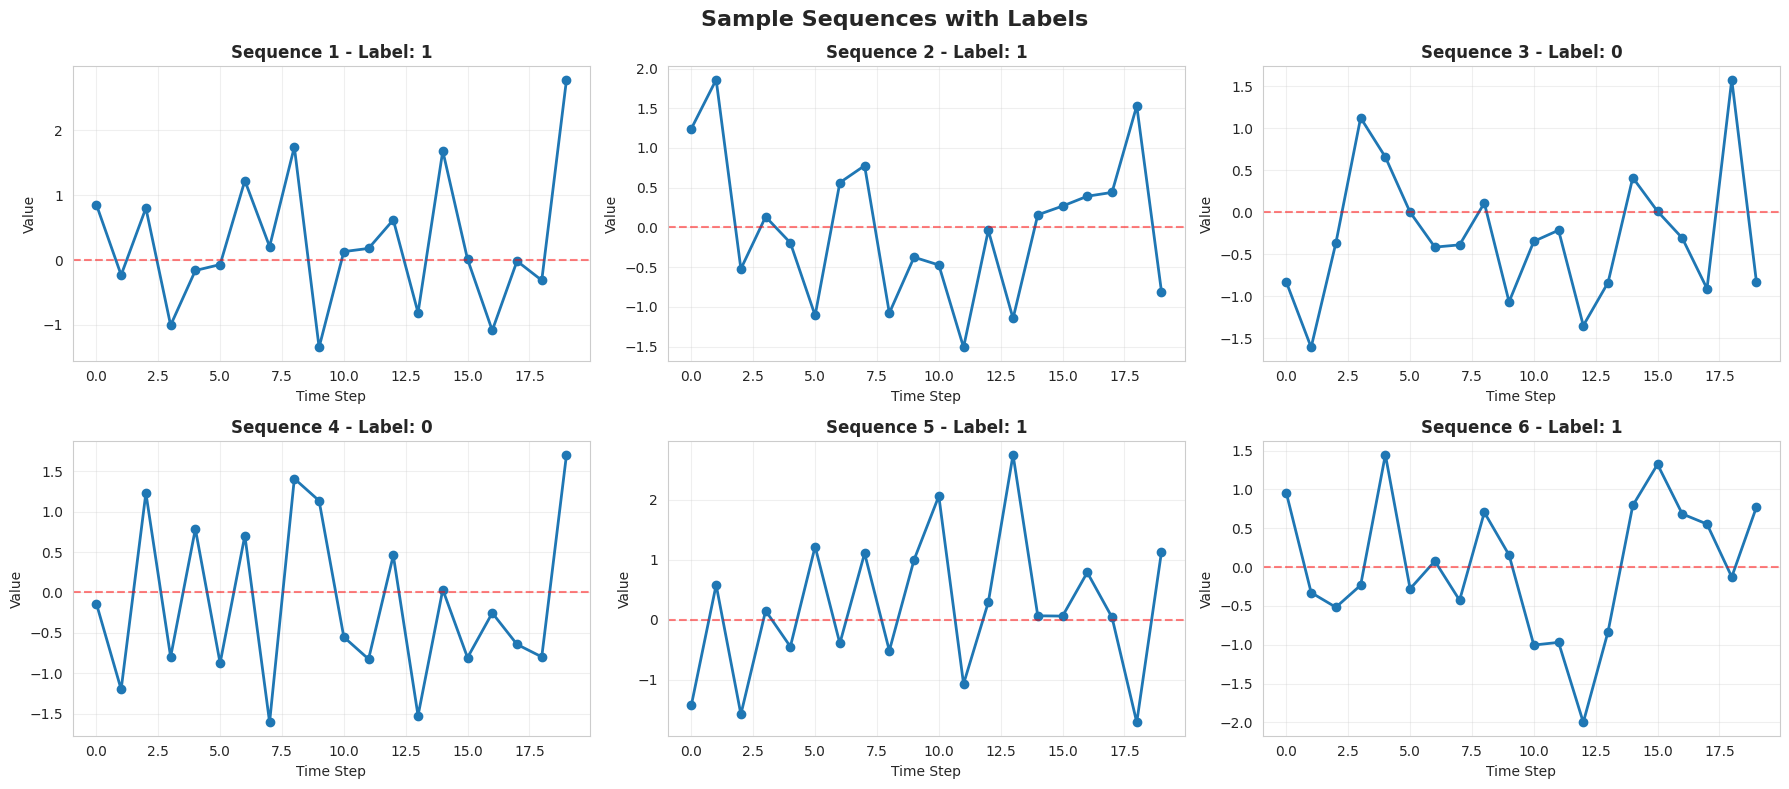

In [14]:
# Visualize sample sequences
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
fig.suptitle('Sample Sequences with Labels', fontsize=16, fontweight='bold')

for i in range(6):
    ax = axes[i // 3, i % 3]
    sample_idx = i * 100
    ax.plot(X_train_seq[sample_idx, :, 0], marker='o', linewidth=2)
    ax.set_title(f'Sequence {i+1} - Label: {y_train_seq[sample_idx]}', fontweight='bold')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [15]:
# for i in range(6):
#     ax = axes[i // 3, i % 3]
#     sample_idx = i * 100
#     ax.plot(X_train_seq[sample_idx, :, 0], marker='o', linewidth=2)
#     ax.set_title(f'Sequence {i+1} - Label: {y_train_seq[sample_idx]}', fontweight='bold')
#     ax.set_xlabel('Time Step')
#     ax.set_ylabel('Value')
#     ax.grid(True, alpha=0.3)
#     ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)

# plt.tight_layout()
# plt.show()

In [16]:
# Build Simple RNN
print("\n🏗️  Building Simple RNN Architecture:")
print("-" * 100)


🏗️  Building Simple RNN Architecture:
----------------------------------------------------------------------------------------------------


In [17]:
model_simple_rnn = models.Sequential([
    layers.Input(shape=(20, 1)),
    layers.SimpleRNN(32, activation='tanh', return_sequences=True, name='rnn1'),
    layers.SimpleRNN(16, activation='tanh', name='rnn2'),
    layers.Dense(8, activation='relu', name='dense1'),
    layers.Dense(1, activation='sigmoid', name='output')
], name='Simple_RNN')

In [18]:
model_simple_rnn.summary()

Model: "Simple_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rnn1 (SimpleRNN)                │ (None, 20, 32)         │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn2 (SimpleRNN)                │ (None, 16)             │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,017 (7.88 KB)

 Trainable params: 2,017 (7.88 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile
model_simple_rnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [20]:
# Train
print("\n🎯 Training Simple RNN...")
history_rnn = model_simple_rnn.fit(
    X_train_seq, y_train_seq,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


🎯 Training Simple RNN...
Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7236 - loss: 0.5597 - val_accuracy: 0.8656 - val_loss: 0.3813
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9149 - loss: 0.2868 - val_accuracy: 0.9031 - val_loss: 0.2525
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9209 - loss: 0.2054 - val_accuracy: 0.9156 - val_loss: 0.2032
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9410 - loss: 0.1625 - val_accuracy: 0.9375 - val_loss: 0.1683
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9495 - loss: 0.1388 - val_accuracy: 0.9438 - val_loss: 0.1478
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9536 - loss: 0.1197 - val_accuracy: 0.9531 - val_loss: 0.1317
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9585 - loss: 0.1068 - val_accuracy: 0.9406 - val_loss: 0.1262
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9615 - loss: 0.0945 - val_a

In [21]:
# Evaluate
test_loss, test_acc = model_simple_rnn.evaluate(X_test_seq, y_test_seq, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")


✅ Test Accuracy: 0.9675
✅ Test Loss: 0.0835


Text(0.5, 0.98, 'Simple RNN - Training Performance')

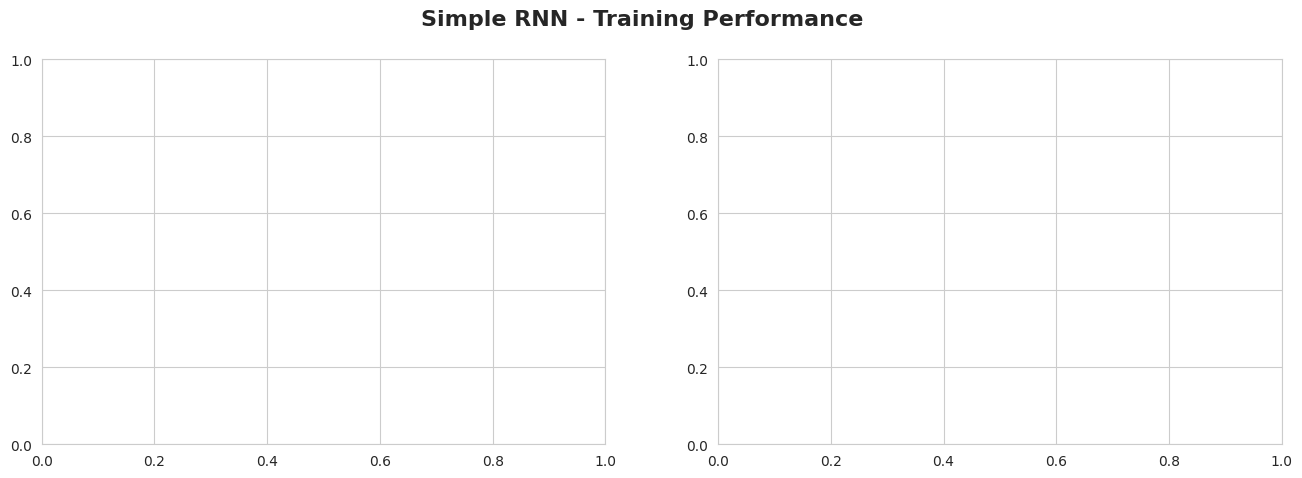

In [22]:
# Visualize RNN Performance
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Simple RNN - Training Performance', fontsize=16, fontweight='bold')


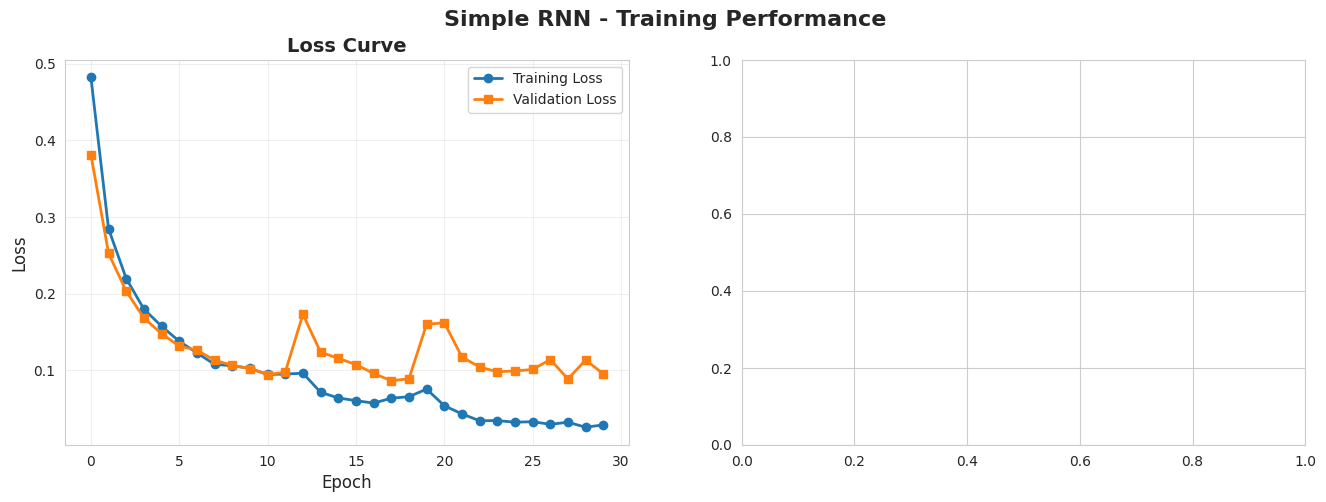

In [24]:
# Visualize RNN Performance
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Simple RNN - Training Performance', fontsize=16, fontweight='bold')

# Plot 1: Loss
ax = axes[0]
ax.plot(history_rnn.history['loss'], label='Training Loss', linewidth=2, marker='o')
ax.plot(history_rnn.history['val_loss'], label='Validation Loss', linewidth=2, marker='s')
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.set_title('Loss Curve', fontweight='bold', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

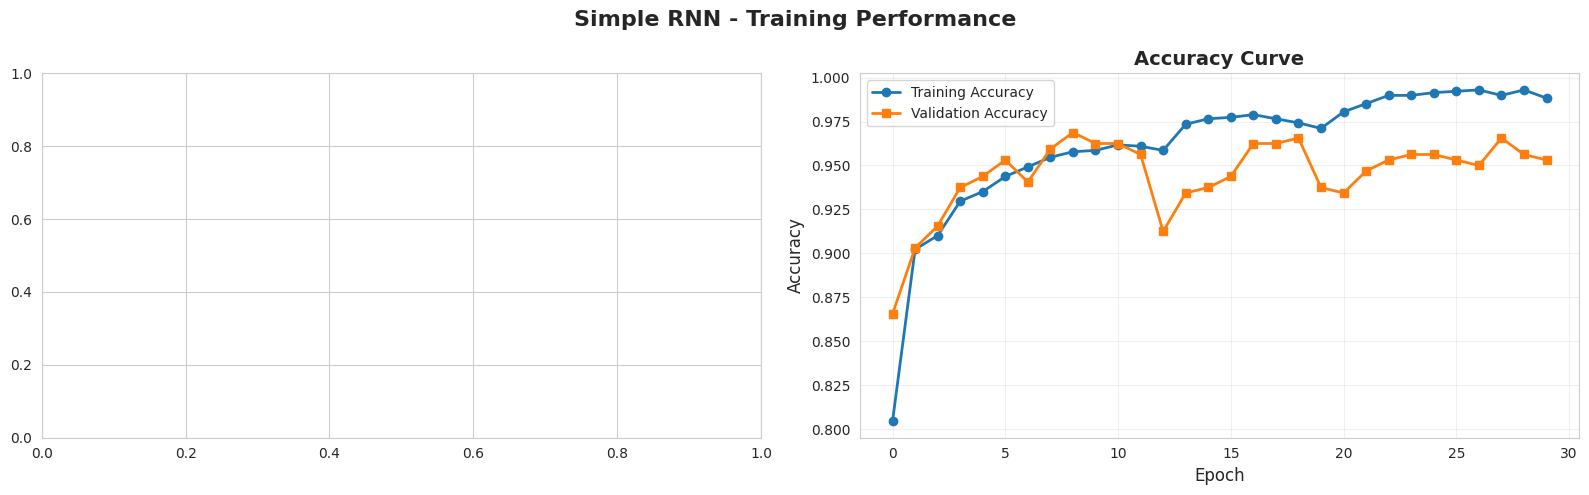

In [26]:
# Visualize RNN Performance
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Simple RNN - Training Performance', fontsize=16, fontweight='bold')
# Plot 2: Accuracy
ax = axes[1]
ax.plot(history_rnn.history['accuracy'], label='Training Accuracy', linewidth=2, marker='o')
ax.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='s')
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy Curve', fontweight='bold', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# PART 2: LSTM - SENTIMENT ANALYSIS (IMDB REVIEWS)
# ============================================================================


In [27]:
print("\n" + "=" * 100)
print("💬 PART 2: LSTM - SENTIMENT ANALYSIS (IMDB Movie Reviews)")
print("=" * 100)


💬 PART 2: LSTM - SENTIMENT ANALYSIS (IMDB Movie Reviews)


In [28]:
# Load IMDB dataset
print("\n📥 Loading IMDB Dataset...")
max_features = 10000  # Vocabulary size
maxlen = 200  # Maximum review length



📥 Loading IMDB Dataset...


In [29]:
(X_train_imdb, y_train_imdb), (X_test_imdb, y_test_imdb) = keras.datasets.imdb.load_data(
    num_words=max_features
)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [32]:
y_train_imdb

array([1, 0, 0, ..., 0, 1, 0])

In [30]:
print(f"Training Samples: {len(X_train_imdb)}")
print(f"Test Samples: {len(X_test_imdb)}")
print(f"Sample Review Length: {len(X_train_imdb[0])} words")
print(f"Label Distribution: Positive={np.sum(y_train_imdb)}, Negative={len(y_train_imdb)-np.sum(y_train_imdb)}")


Training Samples: 25000
Test Samples: 25000
Sample Review Length: 218 words
Label Distribution: Positive=12500, Negative=12500


In [33]:
# Decode a sample review
word_index = keras.datasets.imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [34]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [ ]:
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

print(f"\n📝 Sample Review (Positive):")
print(decode_review(X_train_imdb[0])[:500] + "...")
print(f"Label: {'Positive' if y_train_imdb[0] == 1 else 'Negative'}")


In [ ]:
# Pad sequences
X_train_imdb = pad_sequences(X_train_imdb, maxlen=maxlen, padding='post', truncating='post')
X_test_imdb = pad_sequences(X_test_imdb, maxlen=maxlen, padding='post', truncating='post')

print(f"\nPadded Shape: {X_train_imdb.shape}")

In [ ]:
# Build LSTM Model
print("\n🏗️  Building LSTM Model for Sentiment Analysis:")
print("-" * 100)

In [ ]:
model_lstm = models.Sequential([
    layers.Input(shape=(maxlen,)),
    layers.Embedding(max_features, 128, name='embedding'),
    layers.LSTM(64, return_sequences=True, name='lstm1'),
    layers.Dropout(0.3, name='dropout1'),
    layers.LSTM(32, name='lstm2'),
    layers.Dropout(0.3, name='dropout2'),
    layers.Dense(16, activation='relu', name='dense1'),
    layers.Dropout(0.5, name='dropout3'),
    layers.Dense(1, activation='sigmoid', name='output')
], name='LSTM_Sentiment')

model_lstm.summary()

In [ ]:
# Compile
model_lstm.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)


In [ ]:
# Train
print("\n🎯 Training LSTM on IMDB Dataset...")
history_lstm = model_lstm.fit(
    X_train_imdb, y_train_imdb,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

In [ ]:
# Evaluate
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(X_test_imdb, y_test_imdb, verbose=0)
print(f"\n✅ LSTM Test Accuracy: {test_acc_lstm:.4f}")
print(f"✅ LSTM Test Loss: {test_loss_lstm:.4f}")


In [ ]:
# Make predictions
y_pred_lstm = (model_lstm.predict(X_test_imdb, verbose=0) > 0.5).astype(int).flatten()


In [ ]:
# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test_imdb, y_pred_lstm,
                          target_names=['Negative', 'Positive']))


In [ ]:
# Visualize LSTM Performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('LSTM Sentiment Analysis - Performance', fontsize=16, fontweight='bold')


In [ ]:
# Plot 1: Loss
ax = axes[0, 0]
ax.plot(history_lstm.history['loss'], label='Training Loss', linewidth=2, marker='o')
ax.plot(history_lstm.history['val_loss'], label='Validation Loss', linewidth=2, marker='s')
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.set_title('Loss Curve', fontweight='bold', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

In [ ]:
# Plot 2: Accuracy
ax = axes[0, 1]
ax.plot(history_lstm.history['accuracy'], label='Training Accuracy', linewidth=2, marker='o')
ax.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='s')
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy Curve', fontweight='bold', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

In [ ]:
# Plot 3: Confusion Matrix
ax = axes[1, 0]
cm = confusion_matrix(y_test_imdb, y_pred_lstm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            cbar_kws={'label': 'Count'})
ax.set_title('Confusion Matrix', fontweight='bold', fontsize=14)
ax.set_ylabel('True Label', fontsize=12)
ax.set_xlabel('Predicted Label', fontsize=12)

In [ ]:
# Plot 4: Prediction Confidence Distribution
ax = axes[1, 1]
predictions_proba = model_lstm.predict(X_test_imdb, verbose=0).flatten()
ax.hist(predictions_proba[y_test_imdb == 0], bins=50, alpha=0.6, label='Negative Reviews', color='red')
ax.hist(predictions_proba[y_test_imdb == 1], bins=50, alpha=0.6, label='Positive Reviews', color='green')
ax.set_xlabel('Prediction Probability', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Prediction Confidence Distribution', fontweight='bold', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Test on custom reviews
print("\n🧪 Testing on Custom Reviews:")
custom_reviews = [
    "This movie was absolutely fantastic! I loved every minute of it.",
    "Terrible waste of time. Very boring and predictable.",
    "Not bad, but could have been better. Average at best."
]

In [ ]:
def predict_sentiment(review_text):
    # Simple tokenization (for demo purposes)
    words = review_text.lower().split()
    encoded = [word_index.get(word, 0) for word in words]
    padded = pad_sequences([encoded], maxlen=maxlen, padding='post', truncating='post')
    pred = model_lstm.predict(padded, verbose=0)[0][0]
    sentiment = "Positive" if pred > 0.5 else "Negative"
    return sentiment, pred

for review in custom_reviews:
    sentiment, confidence = predict_sentiment(review)
    print(f"\nReview: {review}")
    print(f"Prediction: {sentiment} (Confidence: {confidence:.4f})")


In [ ]:
# ============================================================================
# PART 3: GRU vs LSTM COMPARISON
# ============================================================================


In [ ]:
print("\n" + "=" * 100)
print("⚖️  PART 3: GRU vs LSTM COMPARISON")
print("=" * 100)

In [ ]:
# Build GRU Model
print("\n🏗️  Building GRU Model:")
print("-" * 100)

In [ ]:

model_gru = models.Sequential([
    layers.Input(shape=(maxlen,)),
    layers.Embedding(max_features, 128, name='embedding'),
    layers.GRU(64, return_sequences=True, name='gru1'),
    layers.Dropout(0.3, name='dropout1'),
    layers.GRU(32, name='gru2'),
    layers.Dropout(0.3, name='dropout2'),
    layers.Dense(16, activation='relu', name='dense1'),
    layers.Dropout(0.5, name='dropout3'),
    layers.Dense(1, activation='sigmoid', name='output')
], name='GRU_Sentiment')

In [ ]:
model_gru.summary()

In [ ]:
# Compile
model_gru.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train GRU
print("\n🎯 Training GRU on IMDB Dataset...")
history_gru = model_gru.fit(
    X_train_imdb, y_train_imdb,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

In [ ]:
# Evaluate GRU
test_loss_gru, test_acc_gru = model_gru.evaluate(X_test_imdb, y_test_imdb, verbose=0)
print(f"\n✅ GRU Test Accuracy: {test_acc_gru:.4f}")
print(f"✅ GRU Test Loss: {test_loss_gru:.4f}")


In [ ]:
# Compare LSTM vs GRU
print("\n📊 LSTM vs GRU Comparison:")
print("-" * 100)
print(f"LSTM - Test Accuracy: {test_acc_lstm:.4f}, Test Loss: {test_loss_lstm:.4f}")
print(f"GRU  - Test Accuracy: {test_acc_gru:.4f}, Test Loss: {test_loss_gru:.4f}")
print(f"\nLSTM Parameters: {model_lstm.count_params():,}")
print(f"GRU Parameters:  {model_gru.count_params():,}")

In [ ]:
# Visualize Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('LSTM vs GRU Comparison', fontsize=16, fontweight='bold')


In [ ]:
# Plot 1: Accuracy Comparison
ax = axes[0]
epochs_range = range(1, len(history_lstm.history['accuracy']) + 1)
ax.plot(epochs_range, history_lstm.history['val_accuracy'],
        label='LSTM Val Accuracy', linewidth=2, marker='o')
ax.plot(range(1, len(history_gru.history['accuracy']) + 1),
        history_gru.history['val_accuracy'],
        label='GRU Val Accuracy', linewidth=2, marker='s')
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Validation Accuracy', fontsize=12)
ax.set_title('Validation Accuracy Comparison', fontweight='bold', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

In [ ]:
# Plot 2: Model Comparison Metrics
ax = axes[1]
models_comp = ['LSTM', 'GRU']
accuracies = [test_acc_lstm, test_acc_gru]
params = [model_lstm.count_params(), model_gru.count_params()]

x = np.arange(len(models_comp))
width = 0.35

ax2 = ax.twinx()
bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='steelblue', alpha=0.8)
bars2 = ax2.bar(x + width/2, params, width, label='Parameters', color='coral', alpha=0.8)

ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12, color='steelblue')
ax2.set_ylabel('Parameters', fontsize=12, color='coral')
ax.set_title('Model Metrics Comparison', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models_comp)
ax.tick_params(axis='y', labelcolor='steelblue')
ax2.tick_params(axis='y', labelcolor='coral')
ax.set_ylim([0, 1])

In [ ]:
# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()